In [2]:
# Veri seti : https://www.kaggle.com/datasets/mustfkeskin/turkish-movie-sentiment-analysis-dataset
import pandas as pd
df = pd.read_csv('/content/turkish_movie_sentiment_dataset.csv', encoding='utf-8')

In [3]:
# Verimizi inceleyelim ve uygun şekilde preprocess edelim.
df.head()

,comment,film_name,point
0,\n Jean Reno denince zate...,Sevginin Gücü,"5,0"
1,\n Ekşın falan izlemek is...,Sevginin Gücü,"5,0"
2,\n Bu yapım hakkında öyle...,Sevginin Gücü,"5,0"
3,\n finali yeter... (sting...,Sevginin Gücü,"5,0"
4,\n Jean Reno..\r\nbu adam...,Sevginin Gücü,"5,0"


In [4]:
# Sadece tam cümleyi elde etmek için fonksiyon uygulayalım.
# Bu notebookta film_name kolonunu kullanmayacağız sadece comment kolonundaki yazılardan ve kendi oluşturacağımız labeldan yararlanacağız.
# Notebook sonunda verilen bir film değerlendirmesini modelimiz labellayabilecek.
comments = lambda x : x[23:-24]

df["comment"] = df["comment"].apply(comments)
df.head()

,comment,film_name,point
0,Jean Reno denince zaten leon filmi gelir akla ...,Sevginin Gücü,"5,0"
1,Ekşın falan izlemek istiyorsanız eğer bunu izl...,Sevginin Gücü,"5,0"
2,Bu yapım hakkında öyle çok şey yazabilirim ki ...,Sevginin Gücü,"5,0"
3,finali yeter... (sting - shape of my heart)\r\...,Sevginin Gücü,"5,0"
4,Jean Reno..\r\nbu adam kusursuz biri..\r\nve o...,Sevginin Gücü,"5,0"


In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

turkish_stopwords = set(stopwords.words('turkish'))

# NLTK kütüphanesindeki stopwordler biraz yetersiz, kendimiz manuel olarak birkaç tane stopword ekleyelim.
additional_stopwords = {'biri', 'birkaç', 'birşey', 'hep', 'şey', 'şeyi', 'şeyler', 'bazı','ha','mi','bir','misin','mısın','musun','musun','müsün','misiniz','mısınız','müsünüz','musunuz'}
turkish_stopwords.update(additional_stopwords)

print(turkish_stopwords)

{'şey', 'şu', 'ha', 'en', 'musun', 'şeyler', 'acaba', 'birşey', 'kim', 'neden', 'misiniz', 'hepsi', 'mi', 'biri', 'yani', 'mısınız', 'siz', 'nasıl', 'çünkü', 'diye', 'defa', 'mu', 'tüm', 'ya', 'mı', 'daha', 'ise', 'ama', 'birkaç', 'belki', 'hem', 'her', 'ile', 'nerde', 'misin', 'niçin', 'şeyi', 'çok', 'müsün', 'müsünüz', 'veya', 'kez', 'aslında', 'de', 'ki', 'az', 'bazı', 'bu', 'ne', 'eğer', 'gibi', 'musunuz', 'bir', 'da', 'biz', 'o', 've', 'mısın', 'hep', 'için', 'niye', 'hiç', 'nerede', 'nereye', 'mü', 'sanki'}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import re
def preprocess_comment(text):
    text = text.lower()
    # Comment kolonunda bazı yerlerde \r, \n gibi özel harfler var bunları kaldıralım.
    text = text.replace("\r", " ")
    text = text.replace("\n", " ")
    # Punctuationları kaldırır.
    text = re.sub(r'[^\w\s]', '', text)
    # Stopwordleri kaldırır
    text = ' '.join([word for word in text.split() if word not in turkish_stopwords])
    return text

In [7]:
df['comment'] = df['comment'].apply(lambda x: preprocess_comment(x))

<Axes: >

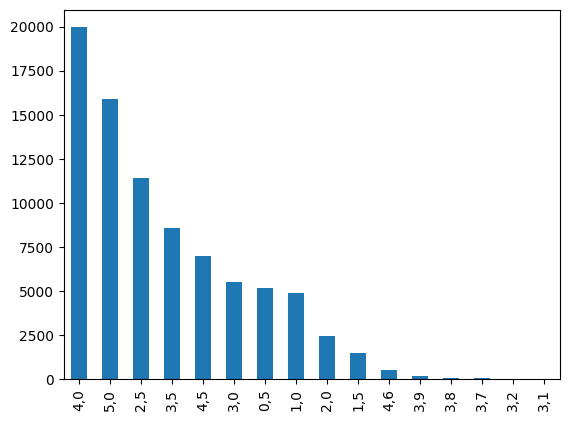

In [8]:
df.point.value_counts().plot(kind='bar')

In [9]:
# Şimdi point kolonunda yola çıkarak kendi labellarımızı oluşturalım.
# 5-3.5 arası -> ortalama üstü(2), 3.5 - 2.5 arası -> ortalama(1), 2.5-0 arası -> ortalama altı(0) olarak labellayalım.
def rating_label(num):
  num = num.replace(',', '.')
  num = float(num)
  if (num >  3.5 and num <= 5):
    return 2
  elif (num <= 3.5 and num > 2.5):
    return 1
  else:
    return 0

In [10]:
df['label'] = df.point.map(rating_label)

<Axes: >

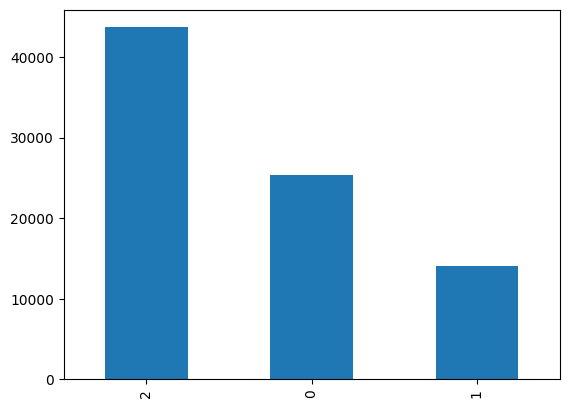

In [11]:
df.label.value_counts().plot(kind='bar')

In [12]:
df.head()

,comment,film_name,point,label
0,jean reno denince zaten leon filmi gelir akla ...,Sevginin Gücü,"5,0",2
1,ekşın falan izlemek istiyorsanız bunu izlemeyi...,Sevginin Gücü,"5,0",2
2,yapım hakkında öyle yazabilirim kitap olur yüz...,Sevginin Gücü,"5,0",2
3,finali yeter sting shape of my heart bazıları ...,Sevginin Gücü,"5,0",2
4,jean reno adam kusursuz oyunculugu müthiş film...,Sevginin Gücü,"5,0",2


In [13]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.8 MB/s eta 0:00:00


In [14]:
from transformers import BertTokenizer

In [15]:
# Kullacanağımız BERT modeli : https://huggingface.co/savasy/bert-base-turkish-sentiment-cased
# Tokenizer'ı importlayalım ve oluşturalım.
tokenizer = BertTokenizer.from_pretrained('savasy/bert-base-turkish-sentiment-cased')

In [16]:
seq_len = 512
num_samples = len(df)

tokens = tokenizer(df['comment'].tolist(), 
                   max_length=seq_len,
                   truncation=True,
                   padding='max_length',
                   add_special_tokens=True,
                   return_tensors='np')

In [17]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [18]:
tokens['input_ids'][0]

array([    2, 13328,  2982,  1017, 27351,  3723, 16651,  5666,  3156,
        9918, 16860,  1014,  6112, 17443,  2204,  5019,  6894,  1986,
       23200,  7738,  2366,  3212,  3472,     3,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [19]:
len(tokens['input_ids'][0])

512

In [20]:
type(tokens['input_ids'])

numpy.ndarray

In [21]:
# Dataseti oluştururken kullanacağımız özellikleri alalım.
Xids = tokens['input_ids']
Xmask = tokens['attention_mask']

In [22]:
arr = df['label'].values
arr.shape, arr.max(), arr.min()

((83227,), 2, 0)

In [23]:
import numpy as np
# Bu kod parçası labelları one-hot encodeladığımız labels diye bir değişken oluşturur
labels = np.zeros((num_samples, arr.max()+1))
labels[np.arange(num_samples), arr] = 1
labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [24]:
import tensorflow as tf
# dataset'i oluşturalım.
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [25]:
# Dataset'i input_ids, masks ve labels diye ayıralım. Çünkü BERT modellerinin bu inputlara ihtiyacı vardır.
def map_func(input_ids, masks, labels):
  return {'input_ids': input_ids,
          'attention_mask': masks}, labels
dataset = dataset.map(map_func)

In [26]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int64, name=None)}, TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [27]:
batch_size = 32
dataset = dataset.shuffle(1000).batch(batch_size, drop_remainder=True)
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(32, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(32, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(32, 3), dtype=tf.float64, name=None))>

In [28]:
# Şimdi ise training ve validation split'i yapalım.
split = 0.8

In [29]:
size = int((Xids.shape[0] / batch_size) * split)

In [30]:
train_ds = dataset.take(size).prefetch(tf.data.AUTOTUNE)
val_ds = dataset.skip(size).prefetch(tf.data.AUTOTUNE)

In [31]:
# Modelimizi import edelim
from transformers import TFAutoModel
bert = TFAutoModel.from_pretrained('savasy/bert-base-turkish-sentiment-cased', from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [32]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  110617344 
                                                                 
Total params: 110,617,344
Trainable params: 110,617,344
Non-trainable params: 0
_________________________________________________________________


In [33]:
input_ids = tf.keras.layers.Input(shape=(512,), 
                                  name='input_ids', 
                                  dtype='int32')

mask = tf.keras.layers.Input(shape=(512,), 
                                  name='attention_mask', 
                                  dtype='int32')

embeddings = bert.bert(input_ids, attention_mask=mask)[1]

x = tf.keras.layers.Dense(1024, activation='relu')(embeddings)
outputs = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(x)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=outputs)

In [34]:
# Modeldeki 2.layer'ın (BERT layer'ı) trainable özelliğini kapatıyoruz. Sadece önceden train edilmiş weightlerini kullanacağız. 
model.layers[2].trainable = False

In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  110617344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [36]:
# Modelimizi compile edelim, BERT modeli için Adam optimizerında 1e-5 ve 5e-5 arası bir learning rate genellikle tavsiye edilir.
optimizer = tf.keras.optimizers.Adam(5e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[acc])

In [37]:
# Modeli eğitmek uzun sürdüğünden sadece 1 epoch yaptım, daha fazla epoch daha iyi sonuç verecektir.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1
)

2080/2080 [==============================] - 3607s 2s/step - loss: 0.7455 - accuracy: 0.6967 - val_loss: 0.6990 - val_accuracy: 0.7119


In [39]:
# Eşkiya filmi için gelen bir incelemeyi modelimizle değerlendirelim.
text = "Türk sinemasının kilometre taşıdır bu film. Her şeyiyle mükemmeldir."
# Değerlendirme fonksiyonu oluşturalım.
# Önce gelen veriyi tokenlaştıran fonksiyonu
def prep_data(text):
  tokens = tokenizer(text, max_length=512, truncation=True,
                     padding='max_length', add_special_tokens=True,
                     return_tensors='tf')
  return {'input_ids': tokens['input_ids'],
          'attention_mask': tokens['attention_mask']}
# sonra prediction fonksiyonunu oluşturalım.
def predict(text, model=model):
  probs = model.predict(prep_data(text))[0]
  return np.argmax(probs)
# Şimdi ise tahmini gerçekleştirelim.
# Hatırlatma : ortalama üstü(2), ortalama(1), ortalama altı(0)
predict(text, model)

1/1 [==============================] - 3s 3s/step


2